<a href="https://colab.research.google.com/github/RafaaelMendonca/bim_ai_project/blob/main/Projeto_BIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema Preditivo de Riscos e Atrasos em Projetos BIM com Base em Dados de IoT Simulados

- **O seguinte projeto tem como objetivo trazer insights a respeito dos projetos envolvendo BIM. E prever, com dados históricos, o nível do risco do projeto (baixo, médio, alto)**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import pickle


In [5]:
cores_tema = {
    'azul_escuro': '#072f6b',
    'azul_claro': '#c0d9ed',
    'azul_medio': '#549ecc',
    'fundo_geral': '#f0f7fc',
    'fundo_mais_claro': '#f5f9ff'
}


**Sobre o conjunto de dados**
- Descrição
Este conjunto de dados foi desenvolvido para o gerenciamento completo do ciclo de vida de projetos de engenharia civil, integrando Modelagem de Informações da Construção (BIM) e Inteligência Artificial (IA). Inclui dados abrangentes do projeto, abrangendo custos, cronograma, integridade estrutural, condições ambientais, alocação de recursos, riscos de segurança e monitoramento por drones.


---


- **Principais recursos**
  - **Metadados do projeto:** ID, type (bridge, road, building, etc.), location, and timeline.

  - **Dados financeiros:** Planned vs. actual cost, cost overruns.

  - **Dados de cronograma:** Planned vs. actual duration, schedule deviation.

  - **Monitoramento da saúde estrutural:** Vibration levels, crack width, load-bearing capacity.

  - **Fatores ambientais:** Temperature, humidity, air quality, weather conditions.

  - **Gestão de recursos e segurança:** Material usage, labor hours, equipment utilization, accident records.

  - **Monitoramento baseado em drones:** Image analysis scores, anomaly detection, completion percentage.

  - **Variável-alvo:** Nível de risco Risk Level (Low, Medium, High) based on cost, schedule, safety, and structural health.


---


- **Casos de uso**
  - **Modelagem preditiva:** Treine modelos de IA para prever riscos do projeto e otimizar a tomada de decisões.
  - **Integração de BIM e IA:** Aproveite dados de IoT e drones em tempo real para gerenciamento inteligente de construção.
  - **Avaliação de risco:** Identifique sinais precoces de estouros de custo, atrasos e falhas estruturais.
  - **Automação e eficiência:** Desenvolva estruturas automatizadas de manutenção e monitoramento de segurança

*link das informações: https://www.kaggle.com/datasets/ziya07/bim-ai-integrated-dataset*

# Carregamento dos dados e início da análise exploratória

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

data = '/content/bim_ai_civil_engineering_dataset.csv'
df = pd.read_csv(data, encoding='ascii', delimiter=',')
df = df.drop('Project_ID', axis=1)

In [7]:
df

,Project_Type,Location,Start_Date,End_Date,Planned_Cost,Actual_Cost,Cost_Overrun,Planned_Duration,Actual_Duration,Schedule_Deviation,Vibration_Level,Crack_Width,Load_Bearing_Capacity,Temperature,Humidity,Weather_Condition,Air_Quality_Index,Energy_Consumption,Material_Usage,Labor_Hours,Equipment_Utilization,Accident_Count,Safety_Risk_Score,Image_Analysis_Score,Anomaly_Detected,Completion_Percentage,Risk_Level
0,Tunnel,Houston,2020-01-01,2021-09-26,12260784,"15,054,504.05","2,793,720.05",699,813.91,114.91,1.53,2.81,471.20,18.54,49.88,Snowy,210,"25,202.99",244.84,6602,76.30,8,6.19,52.99,0,95.01,High
1,Dam,Houston,2020-01-02,2020-12-06,2369277,"3,507,053.96","1,137,776.96",269,384.12,115.12,0.69,3.70,355.16,23.32,58.64,Snowy,195,"49,066.17",263.12,7121,63.53,5,2.13,50.89,0,25.29,Low
2,Building,Houston,2020-01-03,2021-12-05,23299783,"21,692,126.70","-1,607,656.30",899,"1,081.78",182.78,0.95,3.31,236.49,42.96,36.17,Cloudy,127,"48,192.55",608.99,9956,47.10,2,3.11,93.91,0,97.48,Medium
3,Dam,Houston,2020-01-04,2022-04-12,24499306,"29,469,660.50","4,970,354.50",809,974.57,165.57,0.87,1.78,360.29,22.42,72.05,Cloudy,71,"19,811.15",673.57,3725,86.85,5,4.07,90.45,1,95.10,High
4,Dam,Seattle,2020-01-05,2022-02-12,1749971,"2,329,338.04","579,367.04",354,347.99,-6.01,1.97,4.04,204.79,15.91,57.24,Cloudy,113,"44,866.57",765.48,4368,61.83,6,2.76,78.39,0,43.62,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Road,New York,2022-09-22,2025-02-06,3570115,"4,125,884.59","555,769.59",415,534.34,119.34,0.24,4.19,134.63,35.96,37.03,Rainy,282,"21,590.48",538.25,6277,52.26,3,9.55,99.53,0,62.39,High
996,Bridge,Seattle,2022-09-23,2025-01-02,8499066,"11,893,747.00","3,394,681.00",513,533.38,20.38,1.60,0.36,242.61,43.20,70.78,Sunny,288,"5,454.07",811.37,2780,54.78,0,7.29,52.70,0,86.28,High
997,Bridge,New York,2022-09-24,2025-02-20,5672412,"7,847,153.97","2,174,741.97",528,524.86,-3.14,0.51,4.41,346.23,14.13,24.78,Cloudy,155,"36,012.08",924.64,3413,95.98,3,5.59,63.70,1,66.89,High
998,Tunnel,Seattle,2022-09-25,2023-05-11,20877714,"21,599,897.83","722,183.83",277,362.89,85.89,1.39,1.28,168.71,11.63,86.86,Snowy,275,"49,124.31",449.53,8750,85.34,0,2.64,87.06,0,24.90,Low


In [8]:
# Tamanho dos dados
print("Total de colunas e linhas dos dados")
display(df.shape)

# descrição dos dados
print("\nDescrição dos dados incluindo os objetos")
display(df.describe(include='all'))

# informações extra dos dados
print("\nInformações dos Dados")
display(df.info())

Total de colunas e linhas dos dados


(1000, 27)


Descrição dos dados incluindo os objetos


,Project_Type,Location,Start_Date,End_Date,Planned_Cost,Actual_Cost,Cost_Overrun,Planned_Duration,Actual_Duration,Schedule_Deviation,Vibration_Level,Crack_Width,Load_Bearing_Capacity,Temperature,Humidity,Weather_Condition,Air_Quality_Index,Energy_Consumption,Material_Usage,Labor_Hours,Equipment_Utilization,Accident_Count,Safety_Risk_Score,Image_Analysis_Score,Anomaly_Detected,Completion_Percentage,Risk_Level
count,1000,1000,1000,1000,"1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00",1000,"1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00",1000
unique,5,5,1000,691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,Bridge,Los Angeles,2022-09-26,2022-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rainy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
freq,210,211,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,502
mean,NaN,NaN,NaN,NaN,"26,415,087.63","31,541,079.26","5,125,991.63",538.62,645.56,106.94,1.04,2.46,266.05,17.11,55.48,NaN,174.77,"27,403.79",543.40,"5,395.22",69.45,4.57,5.33,74.92,0.20,55.18,NaN
std,NaN,NaN,NaN,NaN,"14,485,761.88","18,095,958.81","5,931,350.17",204.53,269.38,110.39,0.55,1.43,129.09,15.31,20.24,NaN,72.25,"13,009.21",263.35,"2,617.17",17.36,2.88,2.56,14.61,0.40,25.82,NaN
min,NaN,NaN,NaN,NaN,"1,045,475.00","1,180,251.53","-4,648,578.92",180.00,165.28,-79.14,0.11,0.00,50.11,-10.00,20.02,NaN,50.00,"5,054.16",101.20,"1,001.00",40.02,0.00,1.00,50.04,0.00,10.09,NaN
25%,NaN,NaN,NaN,NaN,"14,310,133.00","16,096,546.66","581,066.14",361.00,424.25,22.40,0.57,1.22,153.96,4.58,37.63,NaN,112.75,"16,153.65",311.35,"3,154.75",54.15,2.00,3.06,62.13,0.00,32.53,NaN
50%,NaN,NaN,NaN,NaN,"26,908,602.00","31,339,224.46","3,326,817.48",535.50,635.47,84.06,1.04,2.42,255.50,17.19,55.74,NaN,177.00,"27,042.80",534.19,"5,371.00",69.53,5.00,5.34,74.88,0.00,55.31,NaN
75%,NaN,NaN,NaN,NaN,"39,570,293.25","45,327,468.95","8,665,132.39",713.00,831.64,173.95,1.54,3.66,373.42,29.87,73.19,NaN,236.00,"38,909.34",773.81,"7,616.50",84.78,7.00,7.49,87.53,0.00,78.20,NaN



Informações dos Dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Project_Type           1000 non-null   object 
 1   Location               1000 non-null   object 
 2   Start_Date             1000 non-null   object 
 3   End_Date               1000 non-null   object 
 4   Planned_Cost           1000 non-null   int64  
 5   Actual_Cost            1000 non-null   float64
 6   Cost_Overrun           1000 non-null   float64
 7   Planned_Duration       1000 non-null   int64  
 8   Actual_Duration        1000 non-null   float64
 9   Schedule_Deviation     1000 non-null   float64
 10  Vibration_Level        1000 non-null   float64
 11  Crack_Width            1000 non-null   float64
 12  Load_Bearing_Capacity  1000 non-null   float64
 13  Temperature            1000 non-null   float64
 14  Humidity               1000 non-nu

None

- Com a analise descritiva podemos ver quais são as variaveis do tipo ``object`` para tratá-los posteriormente.

## **Visualização dos Dados**

Distribuição do nível de risco


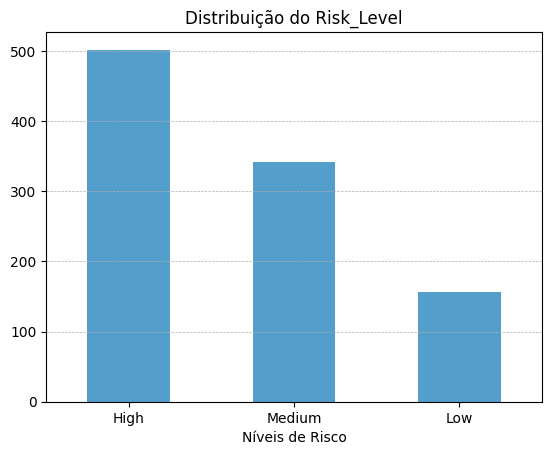

In [9]:
print('Distribuição do nível de risco')
df['Risk_Level'].value_counts().plot(kind='bar', color=cores_tema['azul_medio'])
plt.xticks(rotation=None)
plt.xlabel('Níveis de Risco')
plt.title('Distribuição do Risk_Level')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

Podemos notar que a target está desbalanceada, com o High dominando em torno de 500 amostras, enquanto o low tem aproximadamente 150 amostras

Gráfico mostrando a distribuição dos tipos de construções presentes na base de dados


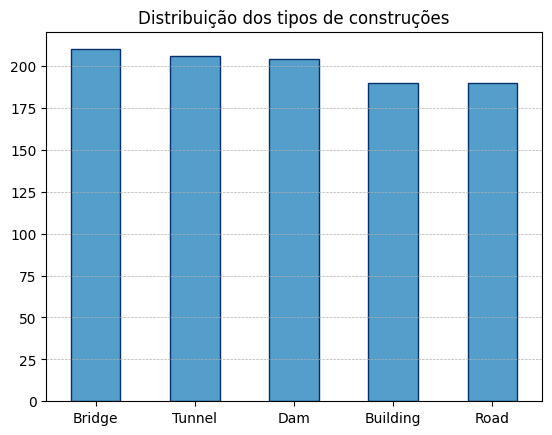

In [10]:
print('Gráfico mostrando a distribuição dos tipos de construções presentes na base de dados')
df['Project_Type'].value_counts().plot(
    kind='bar',
    color=cores_tema['azul_medio'],
    edgecolor=cores_tema['azul_escuro']
)
plt.xticks(rotation=None)
plt.xlabel(None)
plt.title('Distribuição dos tipos de construções')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

**Podemos observar que as pontes são as estruturas mais construídas, seguidas por túneis e barragens.**

In [11]:
df.columns

Index(['Project_Type', 'Location', 'Start_Date', 'End_Date', 'Planned_Cost',
       'Actual_Cost', 'Cost_Overrun', 'Planned_Duration', 'Actual_Duration',
       'Schedule_Deviation', 'Vibration_Level', 'Crack_Width',
       'Load_Bearing_Capacity', 'Temperature', 'Humidity', 'Weather_Condition',
       'Air_Quality_Index', 'Energy_Consumption', 'Material_Usage',
       'Labor_Hours', 'Equipment_Utilization', 'Accident_Count',
       'Safety_Risk_Score', 'Image_Analysis_Score', 'Anomaly_Detected',
       'Completion_Percentage', 'Risk_Level'],
      dtype='object')

In [12]:
df[['Actual_Cost']].max()


,0
Actual_Cost,"72,519,386.55"


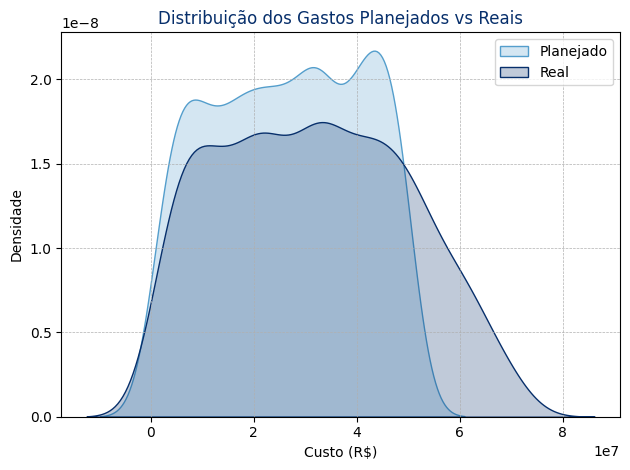

In [13]:
sns.kdeplot(data=df, x='Planned_Cost', label='Planejado', fill=True, color=cores_tema['azul_medio'])
sns.kdeplot(data=df, x='Actual_Cost', label='Real', fill=True, color=cores_tema['azul_escuro'])
plt.title('Distribuição dos Gastos Planejados vs Reais', fontsize=12, color=cores_tema['azul_escuro'])
plt.xlabel('Custo (R$)', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [14]:
# Analise do máximo do planejado e o atual
maximo_custo_atual = df['Actual_Cost'].max()
maximo_custo_planejado = df['Planned_Cost'].max()

print(f"Máximo do planejado: R$ {maximo_custo_planejado:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
print(f"Máximo do atual: R$ {maximo_custo_atual:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))

Máximo do planejado: R$ 49.968.538,00
Máximo do atual: R$ 72.519.386,55


Podemos ver que temos uma diferença significativa entre o planejado e o real. Ou um possível outlier

In [15]:
# Selecionando as variaveis numéricas
numerical_columns = df.select_dtypes(include='number').columns.to_list()

Verificação da distribuição das variáveis numéricas e possíveis outliers


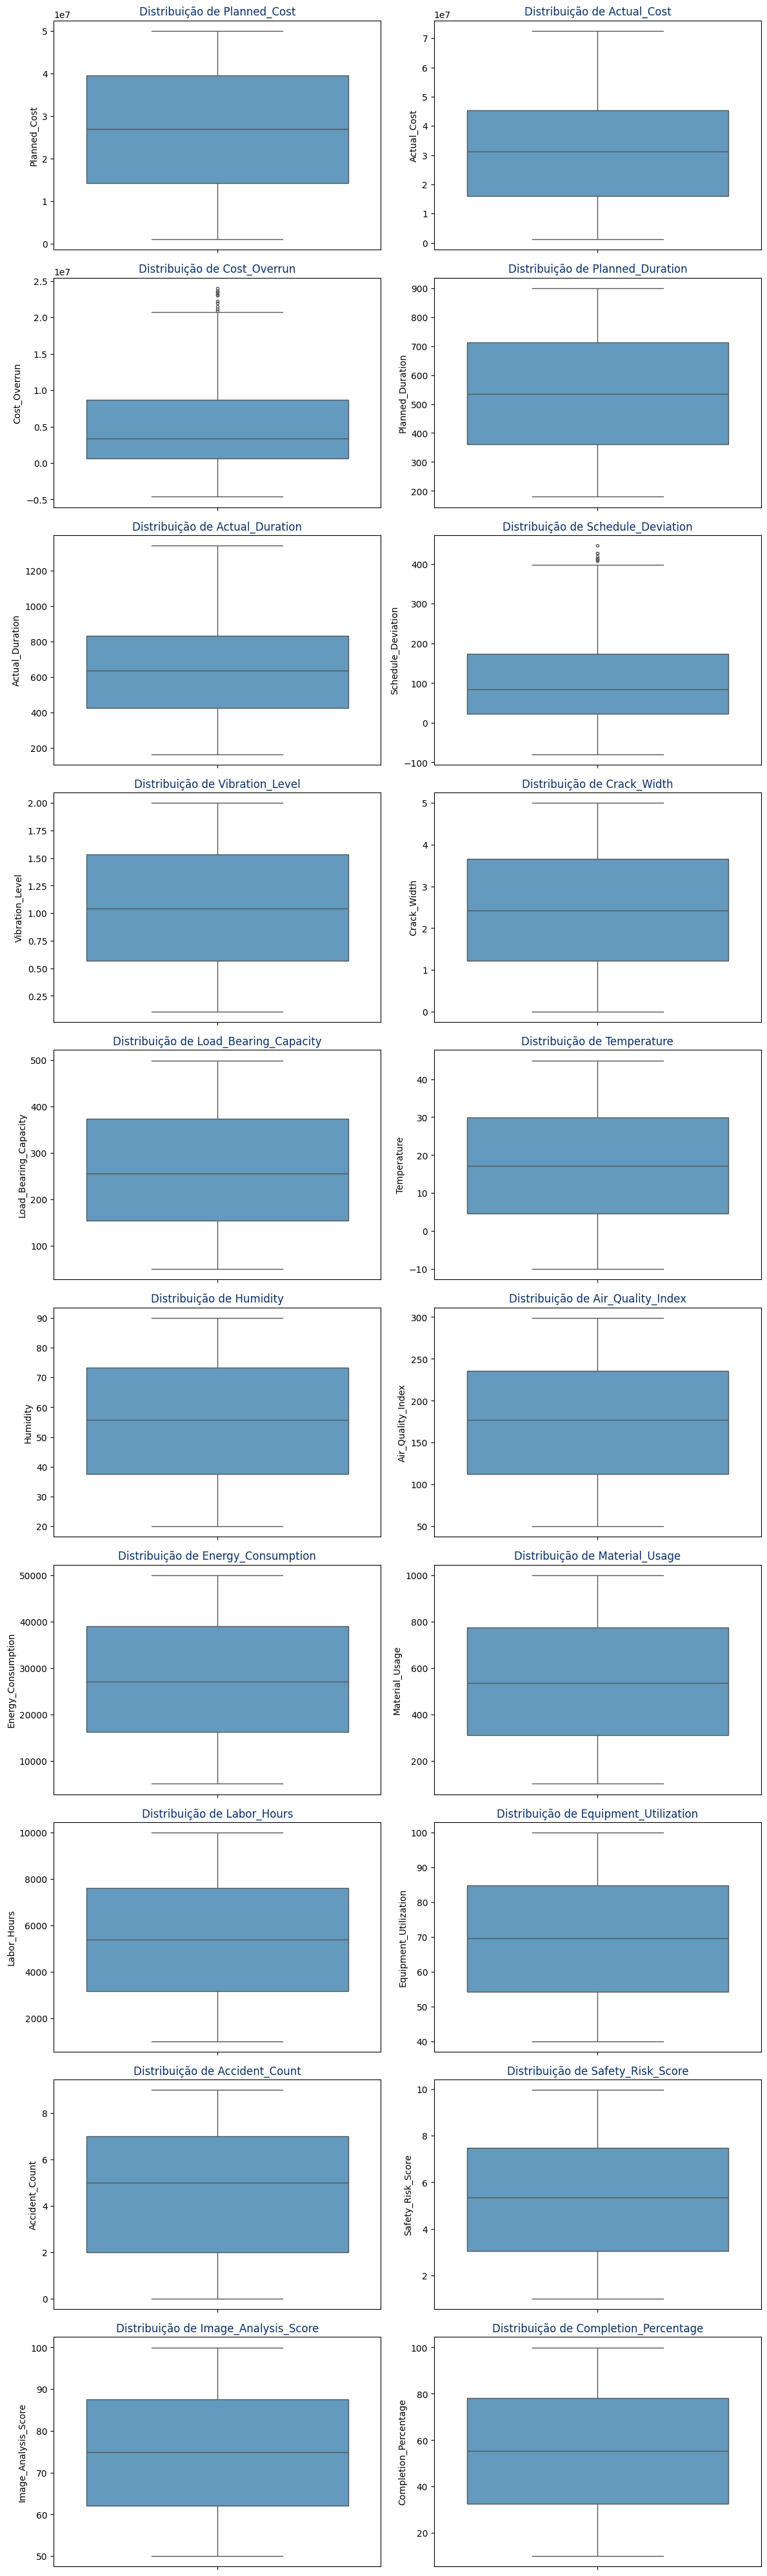

In [16]:
print('Verificação da distribuição das variáveis numéricas e possíveis outliers')

cols_por_linha = 2
total = len(numerical_columns)
fig, axes = plt.subplots(nrows=(total + 1) // cols_por_linha, ncols=cols_por_linha, figsize=(12, 4 * ((total + 1) // cols_por_linha)))
axes = axes.flatten()

eixo_idx = 0

for col in numerical_columns:
    if col == 'Anomaly_Detected':
        continue
    sns.boxplot(data=df, y=col, ax=axes[eixo_idx], color=cores_tema['azul_medio'], fliersize=3)
    axes[eixo_idx].set_title(f'Distribuição de {col}', color=cores_tema['azul_escuro'])
    eixo_idx += 1

for j in range(eixo_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [17]:
"""
# selecionando os outliers
Q1 = df[numerical_columns].quantile(.25)
Q3 = df[numerical_columns].quantile(.75)
IQR = Q3 - Q1
minimo = Q1 - 1.5 * IQR
maximo = Q3 + 1.5 * IQR

outliers = df[(
    (df[numerical_columns] < minimo) |
    (df[numerical_columns] > maximo)
     ).any(axis=1)]

"""

'\n# selecionando os outliers\nQ1 = df[numerical_columns].quantile(.25)\nQ3 = df[numerical_columns].quantile(.75)\nIQR = Q3 - Q1\nminimo = Q1 - 1.5 * IQR\nmaximo = Q3 + 1.5 * IQR\n\noutliers = df[(\n    (df[numerical_columns] < minimo) |\n    (df[numerical_columns] > maximo)\n     ).any(axis=1)]\n\n'

In [18]:
# Criando uma lista para armazenar as colunas que estão com outliers
lista = []
for col in numerical_columns:
  Q1 = df[col].quantile(.25)
  Q3 = df[col].quantile(.75)
  IQR = Q3 - Q1
  minimo = Q1 - 1.5 * IQR
  maximo = Q3 + 1.5 * IQR
  outliers = df[(
    (df[numerical_columns] < minimo) |
    (df[numerical_columns] > maximo)
     ).any(axis=1)]
  if not outliers.empty:
    lista.append(col)

In [19]:
print('Analisando os outliers')
df[lista]

Analisando os outliers


,Cost_Overrun,Planned_Duration,Actual_Duration,Schedule_Deviation,Vibration_Level,Crack_Width,Load_Bearing_Capacity,Temperature,Humidity,Air_Quality_Index,Energy_Consumption,Material_Usage,Labor_Hours,Equipment_Utilization,Accident_Count,Safety_Risk_Score,Image_Analysis_Score,Anomaly_Detected,Completion_Percentage
0,"2,793,720.05",699,813.91,114.91,1.53,2.81,471.20,18.54,49.88,210,"25,202.99",244.84,6602,76.30,8,6.19,52.99,0,95.01
1,"1,137,776.96",269,384.12,115.12,0.69,3.70,355.16,23.32,58.64,195,"49,066.17",263.12,7121,63.53,5,2.13,50.89,0,25.29
2,"-1,607,656.30",899,"1,081.78",182.78,0.95,3.31,236.49,42.96,36.17,127,"48,192.55",608.99,9956,47.10,2,3.11,93.91,0,97.48
3,"4,970,354.50",809,974.57,165.57,0.87,1.78,360.29,22.42,72.05,71,"19,811.15",673.57,3725,86.85,5,4.07,90.45,1,95.10
4,"579,367.04",354,347.99,-6.01,1.97,4.04,204.79,15.91,57.24,113,"44,866.57",765.48,4368,61.83,6,2.76,78.39,0,43.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"555,769.59",415,534.34,119.34,0.24,4.19,134.63,35.96,37.03,282,"21,590.48",538.25,6277,52.26,3,9.55,99.53,0,62.39
996,"3,394,681.00",513,533.38,20.38,1.60,0.36,242.61,43.20,70.78,288,"5,454.07",811.37,2780,54.78,0,7.29,52.70,0,86.28
997,"2,174,741.97",528,524.86,-3.14,0.51,4.41,346.23,14.13,24.78,155,"36,012.08",924.64,3413,95.98,3,5.59,63.70,1,66.89
998,"722,183.83",277,362.89,85.89,1.39,1.28,168.71,11.63,86.86,275,"49,124.31",449.53,8750,85.34,0,2.64,87.06,0,24.90


In [20]:
# Verificando o custo excedido abaixo ou igual a zero
print('Verificando custo abaixo ou igual a zero')
display(df[df['Cost_Overrun'] <= 0])

Verificando custo abaixo ou igual a zero


,Project_Type,Location,Start_Date,End_Date,Planned_Cost,Actual_Cost,Cost_Overrun,Planned_Duration,Actual_Duration,Schedule_Deviation,Vibration_Level,Crack_Width,Load_Bearing_Capacity,Temperature,Humidity,Weather_Condition,Air_Quality_Index,Energy_Consumption,Material_Usage,Labor_Hours,Equipment_Utilization,Accident_Count,Safety_Risk_Score,Image_Analysis_Score,Anomaly_Detected,Completion_Percentage,Risk_Level
2,Building,Houston,2020-01-03,2021-12-05,23299783,"21,692,126.70","-1,607,656.30",899,"1,081.78",182.78,0.95,3.31,236.49,42.96,36.17,Cloudy,127,"48,192.55",608.99,9956,47.10,2,3.11,93.91,0,97.48,Medium
10,Tunnel,New York,2020-01-11,2021-03-28,42011120,"41,130,105.52","-881,014.48",359,412.52,53.52,1.84,2.30,72.12,4.44,44.23,Stormy,173,"12,854.56",472.85,5633,72.11,7,2.86,75.78,0,61.98,Low
12,Dam,Seattle,2020-01-13,2022-04-29,43428797,"43,184,029.04","-244,767.96",560,767.78,207.78,1.80,4.65,299.38,30.92,20.18,Sunny,85,"23,009.86",623.91,2185,55.94,2,5.63,69.92,1,70.01,High
23,Bridge,Seattle,2020-01-24,2021-02-24,32834022,"29,790,113.22","-3,043,908.78",206,308.47,102.47,0.68,2.19,465.04,28.03,39.03,Sunny,216,"20,240.58",424.06,3793,86.40,9,3.92,73.52,1,99.06,Medium
25,Building,Seattle,2020-01-26,2022-01-28,16226559,"15,108,573.09","-1,117,985.91",464,673.92,209.92,0.37,1.46,493.49,17.26,70.29,Sunny,220,"29,475.22",188.98,9361,62.01,2,5.10,64.75,0,48.75,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Tunnel,Chicago,2022-09-02,2024-10-04,36677259,"33,876,403.79","-2,800,855.21",258,347.92,89.92,0.35,1.71,414.83,33.05,26.94,Cloudy,55,"46,439.88",356.23,8243,70.71,1,5.84,66.40,0,97.77,Medium
978,Building,Los Angeles,2022-09-05,2023-10-03,24698370,"22,653,133.95","-2,045,236.05",450,577.92,127.92,0.57,4.41,273.94,11.34,34.32,Stormy,280,"47,519.40",108.63,1333,70.02,6,7.86,88.84,0,70.60,High
980,Building,Houston,2022-09-07,2024-09-28,29658787,"26,894,040.02","-2,764,746.98",426,628.26,202.26,0.35,2.59,77.03,11.90,20.98,Stormy,79,"25,886.08",207.37,8607,75.28,0,5.89,94.46,0,83.38,High
983,Road,New York,2022-09-10,2024-12-15,2383875,"2,203,069.53","-180,805.47",881,880.91,-0.09,0.58,4.82,369.47,-6.22,62.99,Stormy,205,"28,328.34",633.93,6519,80.82,6,8.89,63.95,0,66.76,High


In [21]:
# Analisando o tipo do projeto que mais se tem prejuízo
df_negative = df[df['Cost_Overrun'] <= 0]

In [22]:
df.Project_Type.unique()

array(['Tunnel', 'Dam', 'Building', 'Road', 'Bridge'], dtype=object)

In [23]:
df_negative.Project_Type.value_counts()

,count
Project_Type,
Building,37
Dam,35
Road,35
Tunnel,29
Bridge,28


In [24]:
# Exibindo a quantidade de projetos que tiveram estouro de orçamento
print('Quanbtidade de projetos acima do orçamento previsto')
print(f'Total {df_negative.shape[0]}')

print(f'\nQuantidade total por projeto')
display(df_negative.Project_Type.value_counts())

Quanbtidade de projetos acima do orçamento previsto
Total 164

Quantidade total por projeto


,count
Project_Type,
Building,37
Dam,35
Road,35
Tunnel,29
Bridge,28


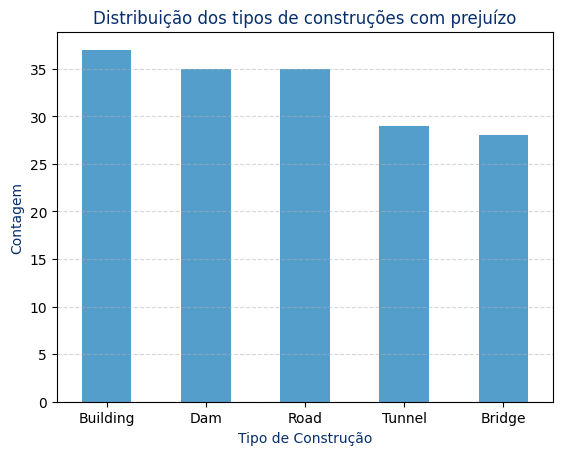

In [25]:
df_negative.Project_Type.value_counts().plot(
    kind='bar',
    color=cores_tema['azul_medio']
)
plt.xticks(rotation=None)
plt.title('Distribuição dos tipos de construções com prejuízo', color=cores_tema['azul_escuro'])
plt.xlabel('Tipo de Construção', color=cores_tema['azul_escuro'])
plt.ylabel('Contagem', color=cores_tema['azul_escuro'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [26]:
quantidade_total = df.shape[0]
quantidade_orcamento_negativo = df_negative.shape[0]

porcentagem_negativos = round((quantidade_orcamento_negativo / quantidade_total * 100), 2)

In [27]:
print(f'A porcentagem dos projetos da engenharia que acabam tendo estouros de orçamento é de {porcentagem_negativos}%')

A porcentagem dos projetos da engenharia que acabam tendo estouros de orçamento é de 16.4%


In [28]:
# Removendo atributos irrelevantes para o modelo
lista_remocao = ['Location', 'Start_Date', 'End_Date']
print('Removendo as seguintes variáveis:', lista_remocao)


Removendo as seguintes variáveis: ['Location', 'Start_Date', 'End_Date']


In [29]:
df = df.drop(lista_remocao, axis=1)

In [30]:
# Tratando as variaveis object
print('Variáveis do tipo object que ainda ficaram na base de dados')
print('-'*60)

object_columns = df.select_dtypes(include='object').columns.to_list()
display(df[object_columns])


Variáveis do tipo object que ainda ficaram na base de dados
------------------------------------------------------------


,Project_Type,Weather_Condition,Risk_Level
0,Tunnel,Snowy,High
1,Dam,Snowy,Low
2,Building,Cloudy,Medium
3,Dam,Cloudy,High
4,Dam,Cloudy,Low
...,...,...,...
995,Road,Rainy,High
996,Bridge,Sunny,High
997,Bridge,Cloudy,High
998,Tunnel,Snowy,Low


In [31]:
X = df.drop('Risk_Level', axis=1)
y = df['Risk_Level']

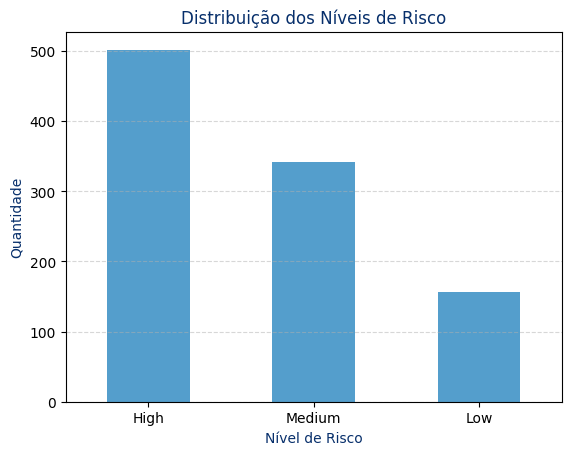

In [32]:
df['Risk_Level'].value_counts().plot(kind='bar', color=cores_tema['azul_medio'])
plt.title('Distribuição dos Níveis de Risco', color=cores_tema['azul_escuro'])
plt.xticks(rotation=None)
plt.xlabel('Nível de Risco', color=cores_tema['azul_escuro'])
plt.ylabel('Quantidade', color=cores_tema['azul_escuro'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [33]:
y.unique()
mapeamento = {
    'High' : 0,
    'Medium' : 1,
    'Low' : 2
}
y = y.map(mapeamento)

In [34]:
lista = X.select_dtypes(include='object').columns.to_list()

In [35]:
onehot = OneHotEncoder(sparse_output=False)
encoded = onehot.fit_transform(X[lista])
X_columns = onehot.get_feature_names_out(lista)

X_ohe = pd.DataFrame(encoded, columns=X_columns)

In [36]:
X = pd.concat([X.drop(columns=lista).reset_index(drop=True), X_ohe.reset_index(drop=True)], axis=1)

In [37]:
X.columns

Index(['Planned_Cost', 'Actual_Cost', 'Cost_Overrun', 'Planned_Duration',
       'Actual_Duration', 'Schedule_Deviation', 'Vibration_Level',
       'Crack_Width', 'Load_Bearing_Capacity', 'Temperature', 'Humidity',
       'Air_Quality_Index', 'Energy_Consumption', 'Material_Usage',
       'Labor_Hours', 'Equipment_Utilization', 'Accident_Count',
       'Safety_Risk_Score', 'Image_Analysis_Score', 'Anomaly_Detected',
       'Completion_Percentage', 'Project_Type_Bridge', 'Project_Type_Building',
       'Project_Type_Dam', 'Project_Type_Road', 'Project_Type_Tunnel',
       'Weather_Condition_Cloudy', 'Weather_Condition_Rainy',
       'Weather_Condition_Snowy', 'Weather_Condition_Stormy',
       'Weather_Condition_Sunny'],
      dtype='object')

In [38]:
X.shape

(1000, 31)

In [39]:
X.shape

(1000, 31)

In [40]:
# feature_count = {}

# for _ in range(30):

#     model = RandomForestClassifier(n_estimators=100)
#     model.fit(X, y)


#     importances = model.feature_importances_
#     feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})


#     top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(7)['Feature'].tolist()


#     for feature in top_10_features:
#         feature_count[feature] = feature_count.get(feature, 0) + 1

# # Converte o dicionário em DataFrame para facilitar a análise
# feature_count_df = pd.DataFrame(list(feature_count.items()), columns=['Feature', 'Count'])
# feature_count_df = feature_count_df.sort_values(by='Count', ascending=False)


# print(feature_count_df)

In [41]:
selected_features = [
    'Safety_Risk_Score',
    'Anomaly_Detected',
    'Schedule_Deviation',
    'Labor_Hours',
    'Actual_Duration',
    'Humidity',
    'Equipment_Utilization',
    'Vibration_Level',
    'Crack_Width',
    'Planned_Duration',
    'Planned_Cost',
    # 'Completion_Percentage',
    'Actual_Cost',
]


In [42]:
X_selecionado = X[selected_features]

In [43]:
X_selecionado

,Safety_Risk_Score,Anomaly_Detected,Schedule_Deviation,Labor_Hours,Actual_Duration,Humidity,Equipment_Utilization,Vibration_Level,Crack_Width,Planned_Duration,Planned_Cost,Actual_Cost
0,6.19,0,114.91,6602,813.91,49.88,76.30,1.53,2.81,699,12260784,"15,054,504.05"
1,2.13,0,115.12,7121,384.12,58.64,63.53,0.69,3.70,269,2369277,"3,507,053.96"
2,3.11,0,182.78,9956,"1,081.78",36.17,47.10,0.95,3.31,899,23299783,"21,692,126.70"
3,4.07,1,165.57,3725,974.57,72.05,86.85,0.87,1.78,809,24499306,"29,469,660.50"
4,2.76,0,-6.01,4368,347.99,57.24,61.83,1.97,4.04,354,1749971,"2,329,338.04"
...,...,...,...,...,...,...,...,...,...,...,...,...
995,9.55,0,119.34,6277,534.34,37.03,52.26,0.24,4.19,415,3570115,"4,125,884.59"
996,7.29,0,20.38,2780,533.38,70.78,54.78,1.60,0.36,513,8499066,"11,893,747.00"
997,5.59,1,-3.14,3413,524.86,24.78,95.98,0.51,4.41,528,5672412,"7,847,153.97"
998,2.64,0,85.89,8750,362.89,86.86,85.34,1.39,1.28,277,20877714,"21,599,897.83"


In [44]:
X_selecionado['Actual_Duration'] = X_selecionado['Actual_Duration'].astype(int)

/tmp/ipython-input-439502272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selecionado['Actual_Duration'] = X_selecionado['Actual_Duration'].astype(int)


In [45]:
X_selecionado

,Safety_Risk_Score,Anomaly_Detected,Schedule_Deviation,Labor_Hours,Actual_Duration,Humidity,Equipment_Utilization,Vibration_Level,Crack_Width,Planned_Duration,Planned_Cost,Actual_Cost
0,6.19,0,114.91,6602,813,49.88,76.30,1.53,2.81,699,12260784,"15,054,504.05"
1,2.13,0,115.12,7121,384,58.64,63.53,0.69,3.70,269,2369277,"3,507,053.96"
2,3.11,0,182.78,9956,1081,36.17,47.10,0.95,3.31,899,23299783,"21,692,126.70"
3,4.07,1,165.57,3725,974,72.05,86.85,0.87,1.78,809,24499306,"29,469,660.50"
4,2.76,0,-6.01,4368,347,57.24,61.83,1.97,4.04,354,1749971,"2,329,338.04"
...,...,...,...,...,...,...,...,...,...,...,...,...
995,9.55,0,119.34,6277,534,37.03,52.26,0.24,4.19,415,3570115,"4,125,884.59"
996,7.29,0,20.38,2780,533,70.78,54.78,1.60,0.36,513,8499066,"11,893,747.00"
997,5.59,1,-3.14,3413,524,24.78,95.98,0.51,4.41,528,5672412,"7,847,153.97"
998,2.64,0,85.89,8750,362,86.86,85.34,1.39,1.28,277,20877714,"21,599,897.83"


In [46]:
X_selecionado.dtypes

,0
Safety_Risk_Score,float64
Anomaly_Detected,int64
Schedule_Deviation,float64
Labor_Hours,int64
Actual_Duration,int64
Humidity,float64
Equipment_Utilization,float64
Vibration_Level,float64
Crack_Width,float64
Planned_Duration,int64


In [47]:
# for i in range(1, 20):
#     model = RandomForestClassifier(
#         n_estimators=150,
#         max_depth=i,
#         min_samples_split=4,
#         min_samples_leaf=2,
#         max_features='sqrt',
#         criterion='entropy',
#         bootstrap=True,
#         random_state=42
#     )
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     acuracia = accuracy_score(y_test, y_pred)
#     print(f'Época: {i} - Acurácia: {acuracia:.4f}')

In [48]:

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selecionado, y, test_size=0.2)

# Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar SMOTE apenas nos dados de treino
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [49]:
model = RandomForestClassifier(
        n_estimators=150,
        max_depth=10,
        min_samples_split=4,
        min_samples_leaf=2,
        max_features='sqrt',
        criterion='entropy',
        bootstrap=True,
    )
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_scaled)
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acuracia:.4f}')

Acurácia: 0.9500


In [50]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Matriz de Confusão:
[[101   5   0]
 [  3  60   2]
 [  0   0  29]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       106
           1       0.92      0.92      0.92        65
           2       0.94      1.00      0.97        29

    accuracy                           0.95       200
   macro avg       0.94      0.96      0.95       200
weighted avg       0.95      0.95      0.95       200



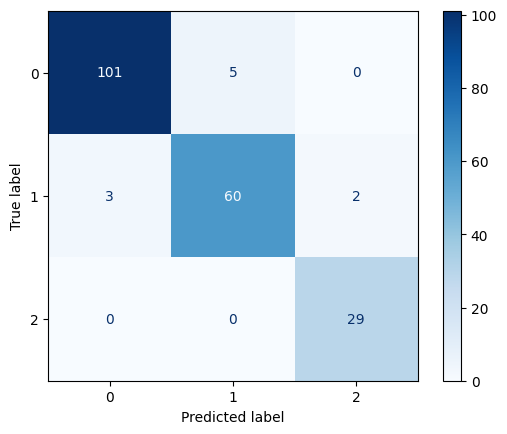

In [51]:
cm = confusion_matrix(y_test, y_pred)

# Exibe a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues');

In [52]:
def novas_features(
    custo_planejado,
    custo_real,
    duracao_planejada,
    duracao_real,
    horas_trabalhadas,
    indice_risco_seguranca,
    anomalia_detectada,
    desvio_cronograma,
    umidade,
    utilizacao_equipamento,
    vibracao,
    largura_fissura,
    scaler,
    model
):


    df = pd.DataFrame([{
        'Safety_Risk_Score': indice_risco_seguranca,
        'Anomaly_Detected': anomalia_detectada,
        'Schedule_Deviation': desvio_cronograma,
        'Labor_Hours': horas_trabalhadas,
        'Actual_Duration': duracao_real,
        'Humidity': umidade,
        'Equipment_Utilization': utilizacao_equipamento,
        'Vibration_Level': vibracao,
        'Crack_Width': largura_fissura,
        'Planned_Duration': duracao_planejada,
        'Planned_Cost': custo_planejado,
        'Actual_Cost': custo_real,
    }])

    df_scaled = scaler.transform(df)
    prediction = model.predict(df_scaled)
    proba = model.predict_proba(df_scaled)[0]

    mapa_predicao = {
    0: "ALTO",
    1: "MÉDIO",
    2: "BAIXO"
    }
    predicao_nome = mapa_predicao[prediction[0]]
    confianca = round(100 * float(proba[prediction]), 2)
    return predicao_nome, confianca


Resultado esperado: Baixo

In [53]:
novas_features(
    custo_planejado=10000,
    custo_real=10000,
    duracao_planejada=100,
    duracao_real=10,
    horas_trabalhadas=0.1,
    indice_risco_seguranca=0.9,
    anomalia_detectada=0,
    desvio_cronograma=0.0,
    umidade=50.0,
    utilizacao_equipamento=1.85,
    vibracao=2.0,
    largura_fissura=10,
    scaler=scaler,
    model=model
)


/tmp/ipython-input-3476394375.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  confianca = round(100 * float(proba[prediction]), 2)


('BAIXO', 72.04)

Resultado esperado: Alto

In [57]:
novas_features(
    custo_planejado=5000,
    custo_real=15000,
    duracao_planejada=1,
    duracao_real=5,
    horas_trabalhadas=200.0,
    indice_risco_seguranca=9.5,
    anomalia_detectada=1,
    desvio_cronograma=4.0,
    umidade=0.9,
    utilizacao_equipamento=0.1,
    vibracao=0.9,
    largura_fissura=1.2,
    scaler=scaler,
    model=model
)


/tmp/ipython-input-3476394375.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  confianca = round(100 * float(proba[prediction]), 2)


('ALTO', 78.65)

Resultado esperado: Médio

In [60]:
novas_features(
    custo_planejado=10000,
    custo_real=12000,
    duracao_planejada=3,
    duracao_real=4,
    horas_trabalhadas=80.0,
    indice_risco_seguranca=4.0,
    anomalia_detectada=0,
    desvio_cronograma=1.0,
    umidade=0.4,
    utilizacao_equipamento=61.83,
    vibracao=0.4,
    largura_fissura=0.4,
    scaler=scaler,
    model=model
)


/tmp/ipython-input-3476394375.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  confianca = round(100 * float(proba[prediction]), 2)


('MÉDIO', 68.96)